In [32]:
import pandas as pd
import numpy as np

In [33]:
df = pd.read_csv("Indian_Kids_Screen_Time.csv")

In [34]:
exceeded = df[df['Exceeded_Recommended_Limit'] == True]
min_screen_time_true = exceeded['Avg_Daily_Screen_Time_hr'].min()
print("Minimum Screen Time (Exceeded Limit):", min_screen_time_true)

Minimum Screen Time (Exceeded Limit): 2.01


In [35]:
not_exceeded = df[df['Exceeded_Recommended_Limit'] == False]
max_screen_time_false = not_exceeded['Avg_Daily_Screen_Time_hr'].max()
print("Minimum Screen Time (Exceeded Limit):", max_screen_time_false)

Minimum Screen Time (Exceeded Limit): 3.0


NO OVERLAP

In [36]:
filtered_data = df[(df['Avg_Daily_Screen_Time_hr'] >= 2.01) & (df['Avg_Daily_Screen_Time_hr'] <= 3)]
filtered_data[['Avg_Daily_Screen_Time_hr', 'Exceeded_Recommended_Limit']]

,Avg_Daily_Screen_Time_hr,Exceeded_Recommended_Limit
6,2.97,False
7,2.74,True
32,2.16,True
44,2.75,False
47,2.34,False
...,...,...
9669,2.50,False
9687,2.33,True
9691,2.26,True
9695,2.69,False


In [37]:
avg_screen_time_fd = filtered_data['Avg_Daily_Screen_Time_hr'].mean()
print("Average Screen Time (2.01–3 hr range):", avg_screen_time_fd)

Average Screen Time (2.01–3 hr range): 2.569587404994571


In [38]:
df['Age'].max()

18

In [39]:
# Import Libraries
import pandas as pd
import numpy as np

# Load Dataset
df = pd.read_csv("Indian_Kids_Screen_Time.csv")

# Quick check
df.head()


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [40]:
# STEP 2: Precompute Insights
# --------------------------------------------

# Filter rows where user hasn't exceeded recommended limit
non_exceeded = df[df['Exceeded_Recommended_Limit'] == False]

# Minimum screen time per age (only among users within safe limits)
min_screen_time_age = (
    non_exceeded.groupby('Age')['Avg_Daily_Screen_Time_hr']
    .max()
    .reset_index()
    .rename(columns={'Avg_Daily_Screen_Time_hr': 'Min_Screen_Time_By_Age'})
)

# Minimum screen time per device
min_screen_time_device = (
    df.groupby('Primary_Device')['Avg_Daily_Screen_Time_hr']
    .max()
    .reset_index()
    .rename(columns={'Avg_Daily_Screen_Time_hr': 'Min_Screen_Time_By_Device'})
)

# Convert to dictionary for quick lookup
age_to_limit = dict(zip(min_screen_time_age['Age'], min_screen_time_age['Min_Screen_Time_By_Age']))
device_to_limit = dict(zip(min_screen_time_device['Primary_Device'], min_screen_time_device['Min_Screen_Time_By_Device']))

# Preview results
print("Age-based Minimum Screen Times:\n", min_screen_time_age)
print("\nDevice-based Minimum Screen Times:\n", min_screen_time_device)


Age-based Minimum Screen Times:
     Age  Min_Screen_Time_By_Age
0     8                    2.00
1     9                    2.00
2    10                    2.00
3    11                    2.99
4    12                    3.00
5    13                    3.00
6    14                    3.00
7    15                    3.00
8    16                    2.98
9    17                    2.99
10   18                    3.00

Device-based Minimum Screen Times:
   Primary_Device  Min_Screen_Time_By_Device
0         Laptop                       8.27
1     Smartphone                      13.89
2             TV                      12.80
3         Tablet                      12.09


In [41]:
  
    # Group by Health Impact to find mean screen time
health_impact_avg = (
    df.groupby('Health_Impacts')['Avg_Daily_Screen_Time_hr']
    .mean()
    .reset_index()
    .rename(columns={'Avg_Daily_Screen_Time_hr': 'Avg_Screen_Time_hr'})
)


In [46]:
# STEP 3: Define Helper Function
# --------------------------------------------
def get_recommended_limit(age, device):
    """
    Returns the recommended screen time limit (hours)
    using both age-based and device-based minimum values.
    """

    # Base limits are minimum screen times for that age & device
    base_age_limit = age_to_limit.get(age, df['Avg_Daily_Screen_Time_hr'].min())
    base_device_limit = device_to_limit.get(device, df['Avg_Daily_Screen_Time_hr'].min())

    # Weighted average recommendation (60% age influence, 40% device influence)
    recommended_limit = (0.5 * base_age_limit) + (0.5 * base_device_limit)
    return round(recommended_limit, 2)


In [47]:
# STEP 4: Main Recommendation System
# --------------------------------------------
def recommendation_system(age, gender, device, screen_time):
    """
    Returns detailed recommendations and insights.
    """

    # Average screen time in 2.01–3 hr range
    filtered_data = df[(df['Avg_Daily_Screen_Time_hr'] >= 2.01) & (df['Avg_Daily_Screen_Time_hr'] <= 3)]
    avg_screen_time_fd = filtered_data['Avg_Daily_Screen_Time_hr'].mean()

    # Exceeded time logic
    if 2.01 <= screen_time <= 3:
        exceeded = screen_time > avg_screen_time_fd
    elif screen_time > 3:
        exceeded = True
    else:
        exceeded = False

    # Percentile position (how many users are behind)
    users_behind = round((df['Avg_Daily_Screen_Time_hr'] < screen_time).mean() * 100, 2)

    # Gender-wise average screen time
    gender_avg = df[df['Gender'] == gender]['Avg_Daily_Screen_Time_hr'].mean()

    # Recommended limit (based on age and device)
    recommended_limit = get_recommended_limit(age, device)

    # Device-wise average screen time
    device_avg = df[df['Primary_Device'] == device]['Avg_Daily_Screen_Time_hr'].mean()

    # Final output
    return {
        "Age": age,
        "Gender": gender,
        "Device": device,
        "Your Screen Time (hrs)": screen_time,
        "Has Exceeded Limit": exceeded,
        "Users Behind (%)": users_behind,
        "Gender-wise Avg Screen Time (hrs)": round(gender_avg, 2),
        "Recommended Limit (hrs)": recommended_limit,
        "Device-wise Avg Screen Time (hrs)": round(device_avg, 2)
    }


In [48]:
# STEP 5: Take User Input
# --------------------------------------------
print("Welcome to the Screen Time Recommendation System")
user_age = int(input("Enter your age: "))
user_gender = input("Enter your gender (Male/Female): ").capitalize()
user_device = input("Enter your primary device (e.g., Smartphone, Laptop, TV): ").capitalize()
user_screen_time = float(input("Enter your average daily screen time (in hours): "))

# STEP 6: Generate and Display Result
# --------------------------------------------
result = recommendation_system(user_age, user_gender, user_device, user_screen_time)

print("\n--- RECOMMENDATION REPORT ---")
for k, v in result.items():
    print(f"{k}: {v}")


Welcome to the Screen Time Recommendation System
Enter your age: 10
Enter your gender (Male/Female): Male
Enter your primary device (e.g., Smartphone, Laptop, TV): TV
Enter your average daily screen time (in hours): 4.32

--- RECOMMENDATION REPORT ---
Age: 10
Gender: Male
Device: Tv
Your Screen Time (hrs): 4.32
Has Exceeded Limit: True
Users Behind (%): 46.89
Gender-wise Avg Screen Time (hrs): 4.38
Recommended Limit (hrs): 1.0
Device-wise Avg Screen Time (hrs): nan


In [22]:
# STEP 7: Textual Summary Insight
difference = result['Your Screen Time (hrs)'] - result['Recommended Limit (hrs)']
if difference > 0:
    print(f"You are spending {difference:.2f} hrs more than the recommended limit.")
else:
    print(f"Great! You are {abs(difference):.2f} hrs below the recommended limit.")


You are spending 1.71 hrs more than the recommended limit.


C:\Users\anavi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


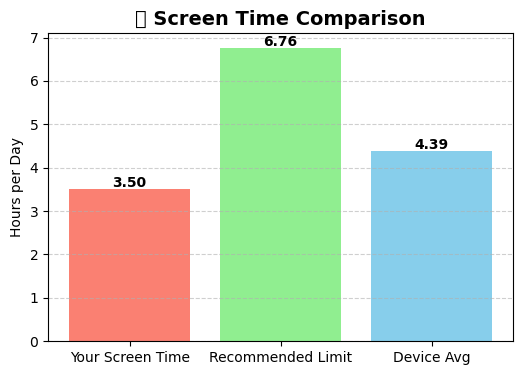

In [45]:
# STEP 8: Visualization – Personal Comparison
import matplotlib.pyplot as plt

# Data for plotting
labels = ['Your Screen Time', 'Recommended Limit', 'Device Avg']
values = [
    result['Your Screen Time (hrs)'],
    result['Recommended Limit (hrs)'],
    result['Device-wise Avg Screen Time (hrs)']
]

# Create bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=['salmon', 'lightgreen', 'skyblue'])

# Add labels and title
plt.title('📊 Screen Time Comparison', fontsize=14, weight='bold')
plt.ylabel('Hours per Day')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate values
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f"{bar.get_height():.2f}", ha='center', fontsize=10, fontweight='bold')

plt.show()


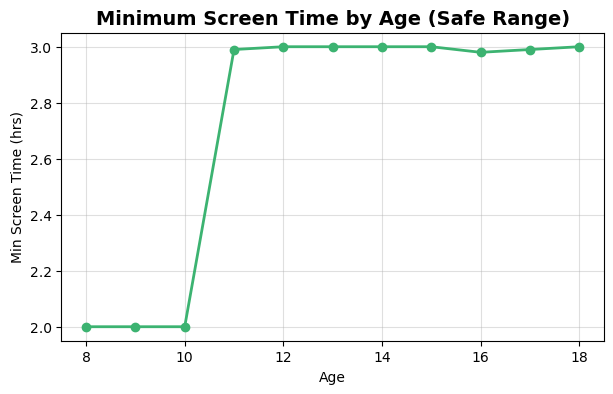

In [20]:
# STEP 9: Visualization – Age-wise Minimum Screen Time Trend
plt.figure(figsize=(7, 4))
plt.plot(min_screen_time_age['Age'], min_screen_time_age['Min_Screen_Time_By_Age'],
         marker='o', color='mediumseagreen', linewidth=2)

plt.title('Minimum Screen Time by Age (Safe Range)', fontsize=14, weight='bold')
plt.xlabel('Age')
plt.ylabel('Min Screen Time (hrs)')
plt.grid(alpha=0.4)
plt.show()


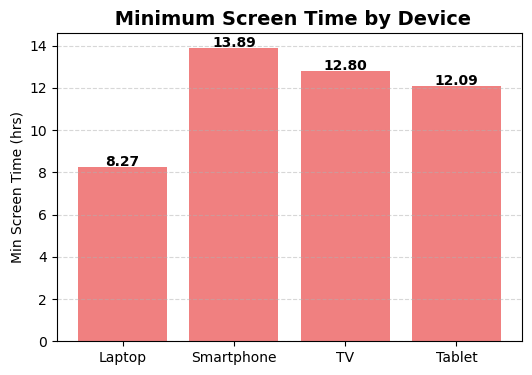

In [21]:
# STEP 10: Visualization – Device-wise Minimum Screen Time
plt.figure(figsize=(6, 4))
bars = plt.bar(min_screen_time_device['Primary_Device'], 
               min_screen_time_device['Min_Screen_Time_By_Device'], color='lightcoral')

plt.title(' Minimum Screen Time by Device', fontsize=14, weight='bold')
plt.ylabel('Min Screen Time (hrs)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.03,
             f"{bar.get_height():.2f}", ha='center', fontsize=10, fontweight='bold')

plt.show()
